# BASICS OF PYTHON | SESSION 5

---
Sina Shafiezadeh | April 2023
---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Send your public repository** to me by email (sina.shafiezadeh@studenti.unipd.it).


i want to know if the energy is positive correlated to the denceability

# 1.&nbsp;Data Importing

In [1]:
# import packages
import pandas as pd
import numpy as np

# 2.&nbsp;Data Cleaning (overview)

In [2]:
data = pd.read_csv('data.csv')  

# 3.&nbsp;Data Cleaning (interpretability)

In [3]:
#let's see the data
print(data)

      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1            

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [5]:
print(data.describe())

        Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.

In [7]:
data[['danceability','energy']]

,danceability,energy
0,0.833,0.434
1,0.743,0.359
2,0.838,0.412
3,0.494,0.338
4,0.678,0.561
...,...,...
2012,0.584,0.932
2013,0.894,0.892
2014,0.637,0.935
2015,0.557,0.992


# 4.&nbsp;Data Cleaning (reduction)

In [6]:
print(data['danceability'].value_counts())

0.683    12
0.760    11
0.704    11
0.646    10
0.614    10
         ..
0.334     1
0.860     1
0.363     1
0.643     1
0.904     1
Name: danceability, Length: 632, dtype: int64


# 5.&nbsp;Data Cleaning (noisy data)

In [8]:
#check if all the data are between 0 and 1
data.sort_values("danceability",axis = 0, ascending=False)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1433,1433,0.001210,0.984,188852,0.9410,0.05390,9,0.0260,-4.560,0,0.0805,122.003,4.0,0.3310,0,Flashwind - Radio Edit,Ben Remember
1901,1901,0.058400,0.967,242733,0.5830,0.00000,7,0.0519,-5.562,0,0.0789,117.000,4.0,0.9650,0,SexyBack,Justin Timberlake
604,604,0.014000,0.962,156800,0.5920,0.64200,9,0.1340,-11.716,0,0.1080,130.684,4.0,0.3610,1,Check Me Out Like,Blaqstarr
32,32,0.035800,0.959,213000,0.5980,0.00000,8,0.3580,-5.534,1,0.0713,127.029,4.0,0.4240,1,Best Friend,Young Thug
1957,1957,0.033600,0.959,268840,0.5450,0.00000,7,0.1500,-14.855,1,0.0623,115.266,4.0,0.7330,0,Ice Ice Baby,Vanilla Ice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1598,0.953000,0.156,458000,0.0230,0.33800,10,0.1650,-31.082,1,0.0445,140.715,4.0,0.0588,0,"Piano Quartet in E flat, Op.47: 3. Andante can...",Robert Schumann
1600,1600,0.913000,0.152,275653,0.0626,0.00204,5,0.1420,-20.947,1,0.0395,137.174,5.0,0.0484,0,"Trio Sonata in G Major, Wq. 144: I. Adagio",Carl Philipp Emanuel Bach
817,817,0.990000,0.148,175173,0.0310,0.59500,2,0.1200,-25.756,0,0.0365,141.840,3.0,0.0638,1,"Mozart: Requiem in D Minor, K. 626: VIII. Lacr...",Nikolaus Harnoncourt
532,532,0.000034,0.123,99413,0.9630,0.03290,10,0.2920,-4.182,1,0.0543,198.040,4.0,0.6800,1,Wake Bake Skate,FIDLAR


In [9]:
data.sort_values("energy",axis = 0, ascending=False)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1299,1299,0.002560,0.468,201783,0.9980,0.00000,9,0.2330,-0.994,0,0.1500,140.003,4.0,0.0640,0,No Absolution,Thy Art Is Murder
1322,1322,0.000049,0.428,221776,0.9970,0.95500,8,0.2530,-3.587,1,0.1850,149.998,4.0,0.0533,0,Pitchblack,Walking Dead On Broadway
1297,1297,0.000015,0.455,311217,0.9940,0.00120,4,0.0908,-4.584,0,0.1930,125.035,4.0,0.0703,0,A Darkened Gospel,A Wake in Providence
1347,1347,0.000017,0.329,135653,0.9930,0.64100,6,0.3420,-3.416,1,0.0969,116.461,4.0,0.3720,0,Unanswered,Suicide Silence
2015,2015,0.001640,0.557,185600,0.9920,0.67700,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.6230,0,First Contact,Twin Moons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,1596,0.995000,0.333,221173,0.0288,0.81900,1,0.0730,-31.367,1,0.0423,100.189,3.0,0.0857,0,"8 Fantasiestücke, Op.12 : 1. Des Abends",Robert Schumann
1598,1598,0.953000,0.156,458000,0.0230,0.33800,10,0.1650,-31.082,1,0.0445,140.715,4.0,0.0588,0,"Piano Quartet in E flat, Op.47: 3. Andante can...",Robert Schumann
1537,1537,0.810000,0.421,337733,0.0161,0.00210,2,0.0978,-25.358,0,0.0374,110.926,4.0,0.1550,0,Blue in Green,Miles Davis
1595,1595,0.915000,0.277,295747,0.0156,0.00654,7,0.1480,-24.801,1,0.0482,117.119,3.0,0.0855,0,"String Quartet No. 4 in C Major, D. 46: II. An...",Franz Schubert


In [ ]:
#the data are believable

# 6.&nbsp;Data Cleaning (completeness)

In [10]:
from numpy.core.fromnumeric import mean
# calculate the danceability mean over all nan values first.

data["danceability"] = data["danceability"].fillna(data["danceability"].mean())
data.info()

# Replaces all null values with the mean (mean can be replaced with almost any function from the stati
####s.fillna(s.mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [11]:
data["energy"] = data["energy"].fillna(data["energy"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


# 7.&nbsp;Data Exploring


# 8.&nbsp;Data Analysis

In [14]:
new_dataset= data[['danceability', 'energy']]
print(new_dataset)

      danceability  energy
0            0.833   0.434
1            0.743   0.359
2            0.838   0.412
3            0.494   0.338
4            0.678   0.561
...            ...     ...
2012         0.584   0.932
2013         0.894   0.892
2014         0.637   0.935
2015         0.557   0.992
2016         0.446   0.915

[2017 rows x 2 columns]


In [16]:
new_dataset.corr() 
#we see a very weak positive correlation, almost 0

,danceability,energy
danceability,1.000000,0.038557
energy,0.038557,1.000000


# 9.&nbsp;Data Visualization

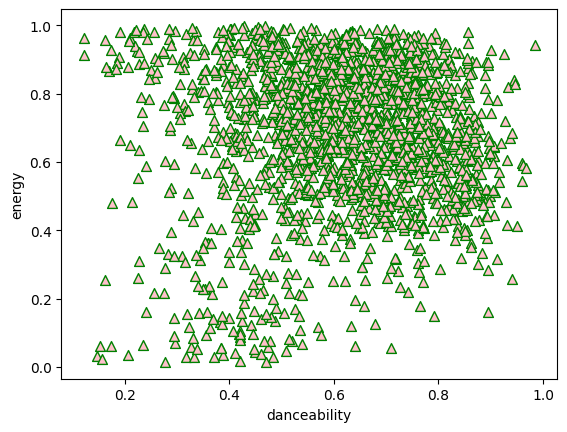

In [17]:

import matplotlib.pyplot as plt

x = data["danceability"]
 
y = data["energy"]
  
plt.scatter(x, y, c ="pink",
            linewidths = 1,
            marker ="^",
            edgecolor ="green",
            s = 50)
 
plt.xlabel("danceability")
plt.ylabel("energy")
plt.show()

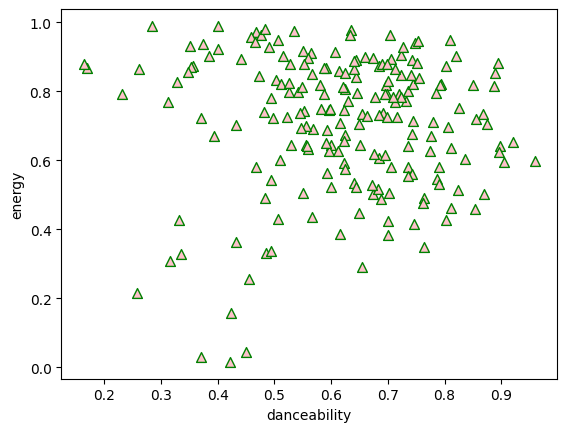

In [18]:
#i wnat to plot just the 10% of my data related to energy and danceability
subset_data = new_dataset.sample(frac=0.1)  # Select a random 10% sample of the data

x = subset_data["danceability"]
y = subset_data["energy"]

plt.scatter(x, y, c="pink",
            linewidths=1,
            marker="^",
            edgecolor="green",
            s=50)

plt.xlabel("danceability")
plt.ylabel("energy")
plt.show()
# as we can see there is not a linear correlation between the two index

# 10.&nbsp;Data Exporting

In [19]:
new_dataset.to_csv('cleaned_data.csv',header=True, index=False)
